In [1]:
import rasterio
from rasterio.plot import plotting_extent
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.patches import Patch
import matplotlib.patheffects as PathEffects
import numpy as np
import geopandas as gpd

In [2]:
# Define your land cover classes and palette
land_cover_dict = {
    11: "Open Water", 12: "Perennial Ice/Snow", 21: "Developed, Open Space",
    22: "Developed, Low Intensity", 23: "Developed, Medium Intensity", 24: "Developed, High Intensity",
    31: "Barren Land", 41: "Deciduous Forest", 42: "Evergreen Forest", 43: "Mixed Forest",
    52: "Shrub/Scrub", 71: "Grassland/Herbaceous", 81: "Pasture/Hay", 82: "Cultivated Crops",
    90: "Woody Wetlands", 95: "Emergent Herbaceous Wetlands"
}
palette = [
    '#466b9f', '#d1def8', '#dec5c5', '#d99282', '#eb0000', '#ab0000',
    '#b3ac9f', '#68ab5f', '#1c5f2c', '#b5c58f', '#ccb879', '#dfdfc2',
    '#dcd939', '#ab6c28', '#b8d9eb', '#6c9fb8'
]
land_cover_colors = dict(zip(land_cover_dict.keys(), palette))
cmap = mcolors.ListedColormap([land_cover_colors[k] for k in land_cover_dict])
bounds = list(land_cover_dict.keys()) + [max(land_cover_dict.keys()) + 1]
norm = mcolors.BoundaryNorm(bounds, cmap.N)

In [3]:
# Read raster
raster_path = "nlcd_clipped.tif"
with rasterio.open(raster_path) as src:
    land_cover = src.read(1)
    profile = src.profile
    land_cover = np.ma.masked_where((land_cover == 0) | (land_cover == 255), land_cover)
    transform = src.transform
    crs = src.crs

In [4]:
# Load shapefile
shapefile = gpd.read_file('../shp/portneuf3_clean/portneuf3_clean.shp')
shapefile = shapefile.to_crs(crs)  # Ensure same CRS as raster

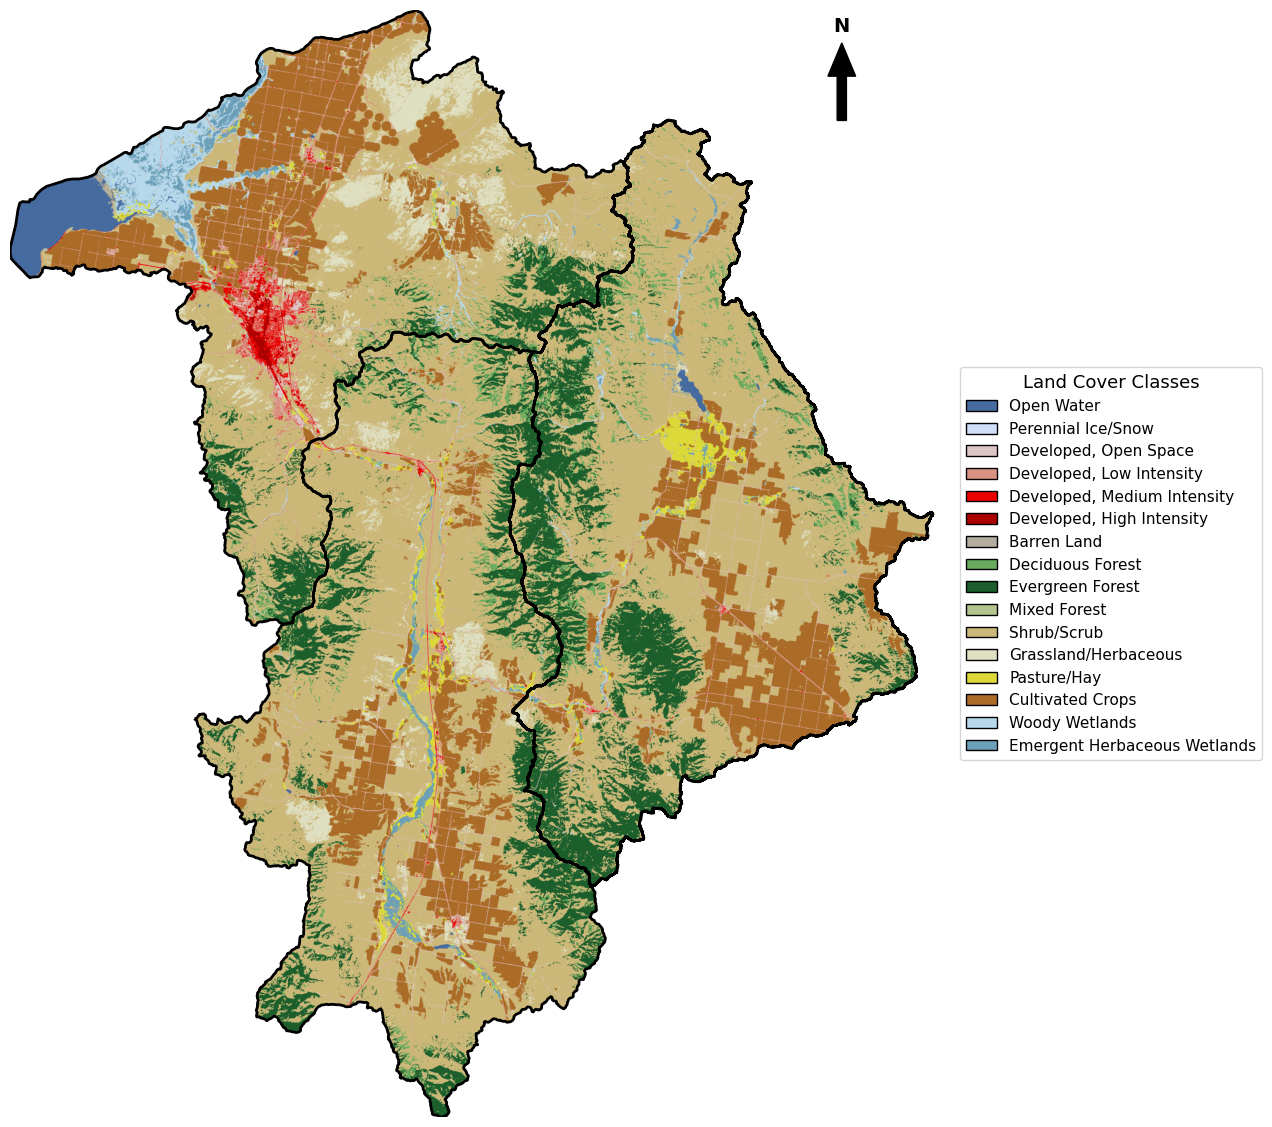

In [ ]:
# Plot
fig, ax = plt.subplots(figsize=(12,12))
raster_img = ax.imshow(land_cover, cmap=cmap, norm=norm, extent=rasterio.plot.plotting_extent(src))
shapefile.boundary.plot(ax=ax, edgecolor='black', linewidth=2)

# ax.set_title("Land Cover with Boundary Overlay", fontsize=16, fontweight='bold')
ax.axis('off')

# Add legend
# Create legend
legend_elements = [
    Patch(facecolor=land_cover_colors[k], label=v, edgecolor='black')
    for k, v in sorted(land_cover_dict.items())
]

ax.legend(
    handles=legend_elements,
    loc='center left',
    bbox_to_anchor=(1.02, 0.5),
    title="Land Cover Classes",
    title_fontsize='13',
    fontsize='11',
    frameon=True
)

from matplotlib.patches import FancyArrow

# Add improved north arrow
arrow_x, arrow_y = 0.9, 0.9
arrow_length = 0.07

# Fancy arrow
ax.add_patch(FancyArrow(
    arrow_x, arrow_y, 0, arrow_length,
    transform=ax.transAxes,
    width=0.01, head_width=0.03, head_length=0.03,
    length_includes_head=True,
    color='black'
))

# Add 'N' label
ax.text(arrow_x, arrow_y + arrow_length + 0.015, 'N',
        transform=ax.transAxes,
        ha='center', va='center',
        fontsize=14, fontweight='bold')

plt.tight_layout()
# Save the figure
plt.savefig('nlcd_lc.png', dpi=400, bbox_inches='tight')
plt.show()

In [6]:
# # Plot
# fig, ax = plt.subplots(figsize=(8,8))
# raster_img = ax.imshow(land_cover, cmap=cmap, norm=norm, extent=rasterio.plot.plotting_extent(src))
# shapefile.boundary.plot(ax=ax, edgecolor='black', linewidth=2)

# # ax.set_title("Land Cover with Boundary Overlay", fontsize=16, fontweight='bold')
# ax.axis('off')

# # Add legend
# # Create legend
# legend_elements = [
#     Patch(facecolor=land_cover_colors[k], label=v, edgecolor='black')
#     for k, v in sorted(land_cover_dict.items())
# ]

# ax.legend(
#     handles=legend_elements,
#     loc='center left',
#     bbox_to_anchor=(1.02, 0.5),
#     title="Land Cover Classes",
#     title_fontsize='11',
#     fontsize='8',
#     frameon=True
# )

# from matplotlib.patches import FancyArrow

# # Add improved north arrow
# arrow_x, arrow_y = 0.9, 0.9   # position (lower-left corner of plot)
# arrow_length = 0.07

# # Fancy arrow
# ax.add_patch(FancyArrow(
#     arrow_x, arrow_y, 0, arrow_length,
#     transform=ax.transAxes,
#     width=0.01, head_width=0.03, head_length=0.03,
#     length_includes_head=True,
#     color='black'
# ))

# # Add 'N' label
# ax.text(arrow_x, arrow_y + arrow_length + 0.015, 'N',
#         transform=ax.transAxes,
#         ha='center', va='center',
#         fontsize=12, fontweight='bold')

# plt.tight_layout()
# # Save the figure
# plt.savefig('nlcd_2005.png', dpi=200, bbox_inches='tight')
# plt.show()